# Segmentazione dei Clienti basata su Spending e Indicatori
Si presenta un approccio Data Driven per una segmentazion e dei clienti basata sui dati del profilo anagrafico, patrimoniale e comportamentale:
* Dati anagrafici e di portafoglio
* Indicatori del patrimonio del Cliente
* Compoeramenti e movimenti di Spesa (Carte e Bancomat)



## Popolazione Clienti e Indicatori 
Viene individuata la popolazione dei Clienti delle Provincie di Milano, Come e Varese.
Importiamo la popolazione dei clienti  con associati indicatori e features estrati da **cli indicatori** e **clienti prodotto**


In [1]:
import os
import pandas as pd

cli_indicat=pd.read_csv('BMED-TargetModel-17-18.csv', sep=';', delimiter=None,            
      header='infer')

cli_indicat.set_index('cod_cliente', inplace=True)
cli_indicat.head()

,PROFILO_RISCHIO,PROV_RES,COMUNE_RES,CODICE_ISTAT,TIPO_CLIENTE,CLASSI_PROBAB_ABBANDONO_12M,PROFILO_M4YOU,CLUSTER_M4YOU,SOTTO_CLUSTER_M4YOU,CLASSE_PATRIMONIO,...,flag_mutui,flag_prestiti,tot_op_inf,tot_op,fl_tgt_cc,fl_tgt_cdc,fl_tgt_fndmdl,fl_tgt_prestiti,fl_tgt_protezione,fl_tgt_mutui
cod_cliente,,,,,,,,,,,,,,,,,,,,,
2968,1) INT - LUNGO,MI,MELZO,15142.0,P,01: bassa,2)ELITE,2)DIAMOND EXTRA,2) DIAMOND EXTRA,06: 500.000 - 2Mln,...,0,0,24.0,39.0,0,0,0,0,0,0
3298,4) EQU - LUNGO,MI,MILANO,15146.0,P,01: bassa,5)SMART,5.4)MASS,5.4.05) MASS PURI CORRENTISTI,03: 15.000 - 50.000,...,0,0,NaN,2.0,0,0,0,0,0,0
3646,5) EQU - MEDIO,CO,CERNOBBIO,13065.0,P,02: media,4)SMART+,4.3)MASS+,4.3.4) MASS+ 30K GESTITO,03: 15.000 - 50.000,...,0,0,NaN,NaN,0,0,0,0,0,0
4090,5) EQU - MEDIO,MI,PAULLO,15169.0,P,02: media,4)SMART+,4.3)MASS+,4.3.7) MASS+ DIPENDENTI,02: 0 - 15.000,...,0,0,NaN,NaN,0,0,0,0,0,0
5843,1) INT - LUNGO,MI,LEGNANO,15118.0,P,01: bassa,3)PRIVILEGE,3.2)DIAMOND,3.2) DIAMOND BASE,04: 50.000 - 100.000,...,0,0,13.0,23.0,0,0,0,0,0,0


In [2]:
print(cli_indicat.shape)
print(list(cli_indicat.columns))

len(cli_indicat)


(96425, 30)
['PROFILO_RISCHIO', 'PROV_RES', 'COMUNE_RES', 'CODICE_ISTAT', 'TIPO_CLIENTE', 'CLASSI_PROBAB_ABBANDONO_12M', 'PROFILO_M4YOU', 'CLUSTER_M4YOU', 'SOTTO_CLUSTER_M4YOU', 'CLASSE_PATRIMONIO', 'CORRENTISTA', 'CLASSE_ETA', 'CLASSE_ANZIANITA', 'CROSS_SELLING', 'CLASSE_REDDITIVITA', 'PATRIMONIO_GESTITO', 'PATRIMONIO_AMMINISTRATO', 'CLASSE_PROFESSIONE', 'flag_cc', 'flag_protezione', 'flag_mutui', 'flag_prestiti', 'tot_op_inf', 'tot_op', 'fl_tgt_cc', 'fl_tgt_cdc', 'fl_tgt_fndmdl', 'fl_tgt_prestiti', 'fl_tgt_protezione', 'fl_tgt_mutui']


96425

Il dataset presenta 96.425 righe, una per ogni cliente, cui sono associati indicatori calcolati al 31-12-2017

## Movimenti Speso Bancomat

Per i clienti della popolazione individuata vengono importati i movimenti di spesa del BANCOMAT per l'anno 2017. Il dataset contiene per ogni cliente la lista dei movimenti aggregata in base a descrizione guppo merceologico `des_grp_merceologico`.

In [3]:



# define converters
# utilizzati per rendere la stringa numerica (che esplicita i decimali con '.') un float
def convert_spesa(number):
    return -float(number);


bancomat_mov=pd.read_csv('SPESO_BANCOMAT_AGGR_EXP_2017_MESI.csv', 
                         sep=';', delimiter=None, header='infer', decimal=".",
                         dtype={"cod_cliente": int, "des_grp_merceologico": str, "valore_speso_bancomat":float,
                             "n_speso_bancomat": int}, converters={"valore_speso_bancomat": convert_spesa} )
bancomat_mov.head(10)


/home/michelepiunti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ParserWarning: Both a converter and dtype were specified for column valore_speso_bancomat - only the converter will be used
  del sys.path[0]


,cod_cliente,des_grp_merceologico,valore_speso_bancomat,n_div_mesi_speso_cat,n_speso_cat
0,3298,NaN,662.15,3,4
1,3298,Clothing,89.00,1,1
2,3298,Food & Drink,662.95,5,8
3,3298,Hotels,257.50,2,2
4,3298,Recurring transaction,1765.70,3,3
5,3298,Restaurant,101.00,1,1
6,3298,Services,140.00,1,1
7,3298,Technolgy,182.99,1,1
8,6149,NaN,100.00,1,1
9,6149,Clothing,234.00,2,4


La colonna n_div_mesi_speso_cat conta il numero di mesi diversi in cui vi sono state transazioni aggregando per la categoria e per il cliente di riferimento. 
La colonna n_speso_cat conta il numero di eventi transazioni relativi alla categoria e al cliente.

Si noti che in questo datset le voci di spesa sono considerate con il segno negativo. 
Operiamo un JOIN fra la **CLI Indicatori** (31 attributi) e **lo speso bancomat** (28 Attributi). Ci aspettiamo un numerol di colonne pari a:

In [4]:
print(bancomat_mov.shape)
print(list(bancomat_mov.columns))
len(bancomat_mov)


(307290, 5)
['cod_cliente', 'des_grp_merceologico', 'valore_speso_bancomat', 'n_div_mesi_speso_cat', 'n_speso_cat']


307290

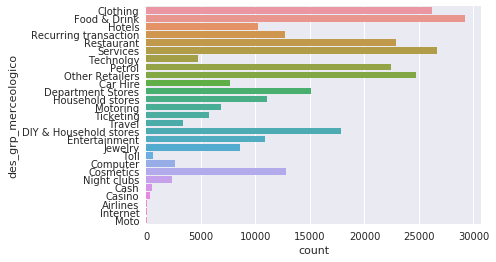

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

#dbanc = bancomat_mov[['des_grp_merceologico','valore_speso_bancomat']].groupby(['des_grp_merceologico']).sum().sort_values(['valore_speso_bancomat'], ascending=False)
#dbanc
sns.countplot(y="des_grp_merceologico", data=bancomat_mov)#,hue_order="true")
plt.show()

In [7]:
print(cli_speso_banc.shape)
print(list(cli_speso_banc.columns))

len(cli_speso_banc)


NameError: name 'cli_speso_banc' is not defined

Con un pivoting, aggreghiamo una riga per cliente trasponendo le categorie di spesa in colonna

In [8]:
# http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/ 


cli_speso_banc = bancomat_mov.pivot(index='cod_cliente', columns='des_grp_merceologico', values='valore_speso_bancomat' )
cli_speso_banc.fillna(0, inplace=True)
cli_speso_banc.head(10)



des_grp_merceologico,nan,Airlines,Car Hire,Cash,Casino,Clothing,Computer,Cosmetics,DIY & Household stores,Department Stores,...,Night clubs,Other Retailers,Petrol,Recurring transaction,Restaurant,Services,Technolgy,Ticketing,Toll,Travel
cod_cliente,,,,,,,,,,,,,,,,,,,,,
3298,662.15,0.0,0.0,0.0,0.0,89.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,1765.70,101.0,140.00,182.99,0.0,0.0,0.00
6149,100.00,0.0,0.0,0.0,0.0,234.00,0.0,0.0,0.00,0.00,...,0.0,0.00,111.39,0.00,0.0,0.00,0.00,0.0,0.0,0.00
16926,969.48,0.0,0.0,0.0,0.0,76.90,0.0,0.0,0.00,0.00,...,0.0,494.72,0.00,0.00,10.2,363.14,0.00,0.0,0.0,0.00
24546,0.00,0.0,0.0,0.0,0.0,209.99,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00
26174,2876.75,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,352.22,0.0,194.40,0.00,0.0,0.0,0.00
27502,0.00,0.0,0.0,0.0,0.0,75.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00
42404,775.77,0.0,882.1,0.0,0.0,164.39,0.0,0.0,0.00,404.80,...,0.0,97.00,697.63,159.54,408.0,47.50,0.00,5.5,0.0,26.00
42412,39.00,0.0,0.0,0.0,0.0,124.97,0.0,0.0,79.43,18.88,...,0.0,40.00,0.00,0.00,0.0,148.00,0.00,0.0,0.0,0.00
50415,1076.29,0.0,205.0,0.0,0.0,59.99,0.0,0.0,872.00,45.10,...,0.0,279.60,833.49,188.80,468.5,406.30,0.00,13.8,8.0,43.92


In [9]:
cli_indicat.columns.size  + cli_speso_banc.columns.size

58

## Movimenti Speso Carte 

In [10]:
carte_mov=pd.read_csv('SPESO_CARTE_AGGR_EXP_2017_MESI.csv', sep=';', delimiter=None,            
      header='infer')
carte_mov.head()

,cod_cliente,des_grp_merceologico,valore_speso_carte,n_div_mesi_speso_cat,n_speso_cat
0,2968,NaN,NaN,1,1
1,3298,NaN,NaN,1,1
2,3646,NaN,NaN,1,1
3,4090,NaN,NaN,1,1
4,5843,Clothing,415.05,2,2


Si noti come il valore dello speso delle carte sia sempre considerato come segno positivo, a differenza dello speso bancomat

(351922, 5)


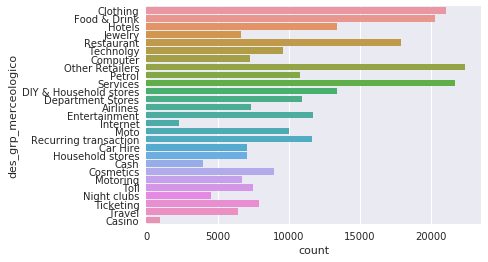

In [11]:
print(carte_mov.shape)

sns.countplot(y="des_grp_merceologico", data=carte_mov)
plt.show()

Con un pivoting, aggreghiamo una riga per cliente trasponendo le categorie di spesa in colonna

In [12]:
# http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/ 


cli_speso_carte = carte_mov.pivot(index='cod_cliente', columns='des_grp_merceologico', values='valore_speso_carte' )
cli_speso_carte.fillna(0, inplace=True)
cli_speso_carte.head(10)

des_grp_merceologico,nan,Airlines,Car Hire,Cash,Casino,Clothing,Computer,Cosmetics,DIY & Household stores,Department Stores,...,Night clubs,Other Retailers,Petrol,Recurring transaction,Restaurant,Services,Technolgy,Ticketing,Toll,Travel
cod_cliente,,,,,,,,,,,,,,,,,,,,,
2968,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3298,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3646,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4090,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,0.0,0.0,0.0,0.0,415.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,327.0,0.0,130.0,0.0,0.0,0.0
6106,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6149,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7102,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7111,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Unificazione dei due Dataset Bancomat e Carte

Procediamo con un **merge** dei i due dataset. Facciamo prima l'unione dei due insiemi

In [13]:

#merge by row
cli_speso = pd.concat([cli_speso_banc, cli_speso_carte])




#cli_speso.rename(columns={'': 'Undefined'}, inplace = True)

cli_speso.columns.values[0] = 'Undefined'

cli_speso.head()

des_grp_merceologico,Undefined,Airlines,Car Hire,Cash,Casino,Clothing,Computer,Cosmetics,DIY & Household stores,Department Stores,...,Night clubs,Other Retailers,Petrol,Recurring transaction,Restaurant,Services,Technolgy,Ticketing,Toll,Travel
cod_cliente,,,,,,,,,,,,,,,,,,,,,
3298,662.15,0.0,0.0,0.0,0.0,89.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,1765.70,101.0,140.00,182.99,0.0,0.0,0.0
6149,100.00,0.0,0.0,0.0,0.0,234.00,0.0,0.0,0.0,0.0,...,0.0,0.00,111.39,0.00,0.0,0.00,0.00,0.0,0.0,0.0
16926,969.48,0.0,0.0,0.0,0.0,76.90,0.0,0.0,0.0,0.0,...,0.0,494.72,0.00,0.00,10.2,363.14,0.00,0.0,0.0,0.0
24546,0.00,0.0,0.0,0.0,0.0,209.99,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0
26174,2876.75,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,352.22,0.0,194.40,0.00,0.0,0.0,0.0


In [14]:
print(cli_speso.shape)
print(list(cli_speso.columns))


print(len(cli_speso_banc))
print(len(cli_speso_carte))

print(len(cli_speso_carte)+len(cli_speso_banc))

print(len(cli_speso))

(131172, 28)
['Undefined', 'Airlines', 'Car Hire', 'Cash', 'Casino', 'Clothing', 'Computer', 'Cosmetics', 'DIY & Household stores', 'Department Stores', 'Entertainment', 'Food & Drink', 'Hotels', 'Household stores', 'Internet', 'Jewelry', 'Moto', 'Motoring', 'Night clubs', 'Other Retailers', 'Petrol', 'Recurring transaction', 'Restaurant', 'Services', 'Technolgy', 'Ticketing', 'Toll', 'Travel']
34747
96425
131172
131172


Raggruppando e aggregando per codice cliente possiamo avere un datamart **una riga per cliente**, con la valorizzazione aggregata per cliente

In [15]:
cli_speso=cli_speso.groupby(['cod_cliente']).sum()
cli_speso.shape

(96425, 28)

Si torna al datamarto originario, una riga poer ognuno dei 96,4K clienti. Il dataframe cli_speso contienene, una riga per cliente, l'aggregato delle voci di spesa per categoria merceologica contando le voci di **speso bancomat** e **speso carte di credito**. Si tratta delle transazioni rilevate dalla nostra base originale di clienti.

### Target Model Final

In [16]:
target_model = cli_indicat.join(cli_speso)
#target_model.set_index('cod_cliente', inplace=True)
target_model.fillna(0, inplace=True)

print(target_model.shape)
print(list(target_model.columns))

len(target_model)

target_model.head()

(96425, 58)
['PROFILO_RISCHIO', 'PROV_RES', 'COMUNE_RES', 'CODICE_ISTAT', 'TIPO_CLIENTE', 'CLASSI_PROBAB_ABBANDONO_12M', 'PROFILO_M4YOU', 'CLUSTER_M4YOU', 'SOTTO_CLUSTER_M4YOU', 'CLASSE_PATRIMONIO', 'CORRENTISTA', 'CLASSE_ETA', 'CLASSE_ANZIANITA', 'CROSS_SELLING', 'CLASSE_REDDITIVITA', 'PATRIMONIO_GESTITO', 'PATRIMONIO_AMMINISTRATO', 'CLASSE_PROFESSIONE', 'flag_cc', 'flag_protezione', 'flag_mutui', 'flag_prestiti', 'tot_op_inf', 'tot_op', 'fl_tgt_cc', 'fl_tgt_cdc', 'fl_tgt_fndmdl', 'fl_tgt_prestiti', 'fl_tgt_protezione', 'fl_tgt_mutui', 'Undefined', 'Airlines', 'Car Hire', 'Cash', 'Casino', 'Clothing', 'Computer', 'Cosmetics', 'DIY & Household stores', 'Department Stores', 'Entertainment', 'Food & Drink', 'Hotels', 'Household stores', 'Internet', 'Jewelry', 'Moto', 'Motoring', 'Night clubs', 'Other Retailers', 'Petrol', 'Recurring transaction', 'Restaurant', 'Services', 'Technolgy', 'Ticketing', 'Toll', 'Travel']


,PROFILO_RISCHIO,PROV_RES,COMUNE_RES,CODICE_ISTAT,TIPO_CLIENTE,CLASSI_PROBAB_ABBANDONO_12M,PROFILO_M4YOU,CLUSTER_M4YOU,SOTTO_CLUSTER_M4YOU,CLASSE_PATRIMONIO,...,Night clubs,Other Retailers,Petrol,Recurring transaction,Restaurant,Services,Technolgy,Ticketing,Toll,Travel
cod_cliente,,,,,,,,,,,,,,,,,,,,,
2968,1) INT - LUNGO,MI,MELZO,15142.0,P,01: bassa,2)ELITE,2)DIAMOND EXTRA,2) DIAMOND EXTRA,06: 500.000 - 2Mln,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3298,4) EQU - LUNGO,MI,MILANO,15146.0,P,01: bassa,5)SMART,5.4)MASS,5.4.05) MASS PURI CORRENTISTI,03: 15.000 - 50.000,...,0.0,0.0,0.0,1765.7,101.0,140.0,182.99,0.0,0.0,0.0
3646,5) EQU - MEDIO,CO,CERNOBBIO,13065.0,P,02: media,4)SMART+,4.3)MASS+,4.3.4) MASS+ 30K GESTITO,03: 15.000 - 50.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4090,5) EQU - MEDIO,MI,PAULLO,15169.0,P,02: media,4)SMART+,4.3)MASS+,4.3.7) MASS+ DIPENDENTI,02: 0 - 15.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
5843,1) INT - LUNGO,MI,LEGNANO,15118.0,P,01: bassa,3)PRIVILEGE,3.2)DIAMOND,3.2) DIAMOND BASE,04: 50.000 - 100.000,...,0.0,0.0,0.0,0.0,327.0,0.0,130.00,0.0,0.0,0.0


## Tavola delle percentuali di Conversion data una *prior condition*
Vogliamo costruire una tavola delle verità in cui per ogni valore di dominio degli indicatori si determina una percentuale di conversion (quantità di clienti che hanno effettivamente sottoscritto un prodotto)

In [17]:
cli_speso.fillna(0, inplace=True)
#cli_speso.head(15)

### Correlation Analysis

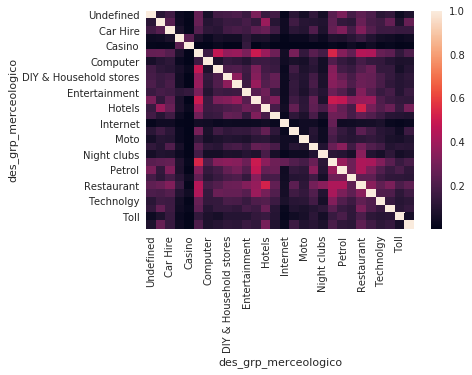

In [18]:
sns.heatmap(cli_speso.corr())
plt.show()

In [19]:

cm = sns.light_palette("orange", as_cmap=True)
cli_speso.corr().style.background_gradient(cmap=cm)

des_grp_merceologico,Undefined,Airlines,Car Hire,Cash,Casino,Clothing,Computer,Cosmetics,DIY & Household stores,Department Stores,Entertainment,Food & Drink,Hotels,Household stores,Internet,Jewelry,Moto,Motoring,Night clubs,Other Retailers,Petrol,Recurring transaction,Restaurant,Services,Technolgy,Ticketing,Toll,Travel
des_grp_merceologico,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Undefined,1,0.113944,0.170704,0.0341873,0.0140912,0.263231,0.06563,0.177042,0.186936,0.201873,0.154608,0.311031,0.152144,0.176268,0.0182485,0.112625,0.0570472,0.131343,0.0580675,0.231253,0.312096,0.182416,0.246975,0.203489,0.11409,0.13488,0.0388423,0.0833946
Airlines,0.113944,1,0.226369,0.0432393,0.0119907,0.263738,0.100333,0.124226,0.155064,0.152056,0.185725,0.135111,0.386546,0.105034,0.0437272,0.168848,0.106375,0.0998576,0.0913959,0.244182,0.13743,0.122627,0.269235,0.191462,0.16876,0.261509,0.0834638,0.266939
Car Hire,0.170704,0.226369,1,0.0738179,0.016638,0.22309,0.121572,0.109219,0.174277,0.190137,0.169887,0.24151,0.270526,0.169408,0.0450445,0.117186,0.0985211,0.211122,0.0835584,0.257612,0.323626,0.184288,0.329546,0.216848,0.159577,0.16295,0.146939,0.148821
Cash,0.0341873,0.0432393,0.0738179,1,0.232983,0.0765874,0.0299885,0.0652195,0.0522976,0.0490925,0.122086,0.0726137,0.0789731,0.0382592,0.011473,0.0317591,0.0313672,0.0658799,0.0364209,0.0855608,0.07728,0.108158,0.153698,0.0920128,0.0562562,0.0471565,0.0306578,0.0448693
Casino,0.0140912,0.0119907,0.016638,0.232983,1,0.00786705,0.00538793,0.0275259,0.00417271,0.00771915,0.142028,0.00429403,0.0268672,0.00219154,0.00796146,0.00514176,0.00712091,0.00248606,0.00646497,0.0230853,0.00865758,0.0418428,0.0174855,0.0455465,0.0124224,0.0253181,0.00911622,0.0137327
Clothing,0.263231,0.263738,0.22309,0.0765874,0.00786705,1,0.1654,0.4816,0.368435,0.381431,0.311145,0.498985,0.387167,0.281752,0.051914,0.303713,0.138512,0.229028,0.178063,0.539951,0.336727,0.253704,0.447452,0.434077,0.266511,0.243099,0.132007,0.206503
Computer,0.06563,0.100333,0.121572,0.0299885,0.00538793,0.1654,1,0.0837158,0.14337,0.12744,0.0961618,0.157383,0.158944,0.145977,0.0481915,0.0758752,0.0627864,0.124196,0.0567115,0.209991,0.144995,0.111361,0.183256,0.144307,0.138146,0.1026,0.0763515,0.0830754
Cosmetics,0.177042,0.124226,0.109219,0.0652195,0.0275259,0.4816,0.0837158,1,0.201707,0.210401,0.169447,0.317151,0.174094,0.158009,0.0326299,0.167425,0.0811073,0.109683,0.0560561,0.335963,0.180553,0.153846,0.216672,0.27174,0.142006,0.142138,0.0638742,0.101344
DIY & Household stores,0.186936,0.155064,0.174277,0.0522976,0.00417271,0.368435,0.14337,0.201707,1,0.35369,0.156266,0.336042,0.204502,0.26109,0.0383584,0.12958,0.0961117,0.175193,0.076746,0.349526,0.258207,0.190056,0.271742,0.262084,0.196938,0.144171,0.100035,0.123096


### Clustering Analysis 
in base alle correlazioni calcolate è possibile vedere se esistono dei cluster omogenei. 
Vediamo ad esempio il nesso fra cluster e voci di spesa. Ipotizziamo di lavorare con un numero di cluster compreso fra 4 e 7, verifichiamo fra questi quale possa essere il numero ottimale. per fare ciò ci avvaliamo della metrica di _Average Within-Cluster distance to Centroid (WCSS)_ che indica la distanza dei punti dal centroide dei cluster di appartenenza:

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


# numero di cluster ipotizzabili
scores = pd.DataFrame()
scores['n_clusters'] = [3,4,5, 6, 7, 8,9,10, 11]

for k in scores['n_clusters']:
 
        # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
        kmeans_model = KMeans(n_clusters=k, random_state=10).fit(cli_speso.iloc[:, :])
 
        # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
        labels = kmeans_model.labels_
        
        # Sum of distances of samples to their closest cluster center
        interia = kmeans_model.inertia_
        print ("n_clusters:",k, " cost:", interia/10000000000)
        scores.loc[scores['n_clusters'] == k,'score']=interia/10000000000



'''
# analisi della siluette score per i vari cluster
for n_cl in scores['n_clusters']:
    kmeans = KMeans(n_clusters=n_cl, random_state=10)
    print()
    scores['n_clusters']: 
    score = kmeans.score(cli_speso)
    print("For n_clusters =", n_cl," the score is :", score)
    scores.loc[scores['n_clusters'] == n_cl,'score']=score
'''   

n_clusters: 3  cost: 58.522063398013785
n_clusters: 4  cost: 54.45125052377453
n_clusters: 5  cost: 50.5672176504806
n_clusters: 6  cost: 45.96260559830846
n_clusters: 7  cost: 42.83480378198823
n_clusters: 8  cost: 40.2592577881388
n_clusters: 9  cost: 38.49734569274277
n_clusters: 10  cost: 36.97413304794976
n_clusters: 11  cost: 35.517221113750686


'\n# analisi della siluette score per i vari cluster\nfor n_cl in scores[\'n_clusters\']:\n    kmeans = KMeans(n_clusters=n_cl, random_state=10)\n    print()\n    scores[\'n_clusters\']: \n    score = kmeans.score(cli_speso)\n    print("For n_clusters =", n_cl," the score is :", score)\n    scores.loc[scores[\'n_clusters\'] == n_cl,\'score\']=score\n'

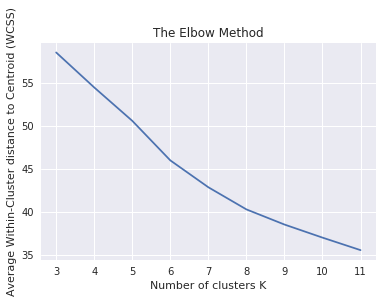

In [21]:
plt.plot(scores['n_clusters'], scores['score'])

#plt.plot(scores) # plotting by columns
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()

Osservando il valore WCSS il gomito utile degli scores si ha per **n\_clusters = 8**, che nell ambito della analisi può essere considerato come un valore base

### Clustering Model

In [22]:
#cli_speso.head(25)

In [23]:
# fissiamo N CLUSTERS: 
N_CL=8
kmeans = KMeans(n_clusters=N_CL, random_state=10)
kmeans.fit(cli_speso)
y_kmeans = kmeans.predict(cli_speso)

y_kmeans


array([0, 0, 0, ..., 0, 3, 0], dtype=int32)

In [24]:
print ("",len(y_kmeans), len(cli_speso))




 96425 96425


In [36]:
target_model['kmeans_cluster'] = np.nan

i=0
for index in target_model.index:
 
    #cod_cliente = index
    
    #cluster = [5]
    cluster=kmeans.predict(target_model.loc[index][cli_speso.columns].values.reshape(1, -1))
    target_model.at[index,'kmeans_cluster'] = cluster[0]
   

    if (i % 10000 )==0:
        print(i,  ") cliente:", index , "  cluser: ",  cluster[0])
    
    i+=1

#end for

print (" Num. Clienti Etichettati: ", i )

#target_model.head()


0 ) cliente: 2968   cluser:  0
10000 ) cliente: 5904033   cluser:  0
20000 ) cliente: 6484778   cluser:  0
30000 ) cliente: 6865905   cluser:  0
40000 ) cliente: 7240333   cluser:  0
50000 ) cliente: 7712142   cluser:  0
60000 ) cliente: 8108605   cluser:  0
70000 ) cliente: 8381866   cluser:  0
80000 ) cliente: 8646024   cluser:  0
90000 ) cliente: 8891654   cluser:  0
 Num. Clienti Etichettati:  96425


In [37]:

#target_model['kmeans_cluster']=y_kmeans

target_model.groupby(['kmeans_cluster']).size()

kmeans_cluster
0.0    71055
1.0     2593
2.0        3
3.0      237
4.0    13607
5.0        1
6.0     7265
7.0     1664
dtype: int64

### Verifica outliers

In [31]:

#target_model[target_model['kmeans_cluster']==5.0]  # cod cliente 7596318
#target_model[target_model['kmeans_cluster']==2.0]  # cod cliente 6337765, 7956444, 8314331
#target_model[target_model['kmeans_cluster']==6].head(6)


#cli = target_model[target_model['cod_cliente']==7596318]
#cli = target_model[target_model['cod_cliente']==8314331]
#cli
#print(cli)

#target_model.head()


Si verifica che esistono clienti Outliers in particolare i clienti 7596318, 6337765, 7956444, 8314331.

In [38]:
cli_speso.columns
# se volessimo rimuovere gli outliers
#cli_speso.drop(cli_speso[cli_speso['cod_cliente'] in (7596318, 6337765, 7956444, 8314331)])

target_model.columns


Index(['PROFILO_RISCHIO', 'PROV_RES', 'COMUNE_RES', 'CODICE_ISTAT',
       'TIPO_CLIENTE', 'CLASSI_PROBAB_ABBANDONO_12M', 'PROFILO_M4YOU',
       'CLUSTER_M4YOU', 'SOTTO_CLUSTER_M4YOU', 'CLASSE_PATRIMONIO',
       'CORRENTISTA', 'CLASSE_ETA', 'CLASSE_ANZIANITA', 'CROSS_SELLING',
       'CLASSE_REDDITIVITA', 'PATRIMONIO_GESTITO', 'PATRIMONIO_AMMINISTRATO',
       'CLASSE_PROFESSIONE', 'flag_cc', 'flag_protezione', 'flag_mutui',
       'flag_prestiti', 'tot_op_inf', 'tot_op', 'fl_tgt_cc', 'fl_tgt_cdc',
       'fl_tgt_fndmdl', 'fl_tgt_prestiti', 'fl_tgt_protezione', 'fl_tgt_mutui',
       'Undefined', 'Airlines', 'Car Hire', 'Cash', 'Casino', 'Clothing',
       'Computer', 'Cosmetics', 'DIY & Household stores', 'Department Stores',
       'Entertainment', 'Food & Drink', 'Hotels', 'Household stores',
       'Internet', 'Jewelry', 'Moto', 'Motoring', 'Night clubs',
       'Other Retailers', 'Petrol', 'Recurring transaction', 'Restaurant',
       'Services', 'Technolgy', 'Ticketing', 'Toll'

In [39]:

cols = ['cod_cliente','kmeans_cluster']
cols.extend(cli_speso.columns)

#target_model[target_model['cod_cliente'] == 3298][cols]

#3298, 6149, 16926, 
target_model.loc[3298][cols]

/home/michelepiunti/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


cod_cliente                  NaN
kmeans_cluster                 0
Undefined                 662.15
Airlines                       0
Car Hire                       0
Cash                           0
Casino                         0
Clothing                      89
Computer                       0
Cosmetics                      0
DIY & Household stores         0
Department Stores              0
Entertainment                  0
Food & Drink              662.95
Hotels                     257.5
Household stores               0
Internet                       0
Jewelry                        0
Moto                           0
Motoring                       0
Night clubs                    0
Other Retailers                0
Petrol                         0
Recurring transaction     1765.7
Restaurant                   101
Services                     140
Technolgy                 182.99
Ticketing                      0
Toll                           0
Travel                         0
Name: 3298

In [40]:
#cli_speso.get(16926)
#cli_speso[3298]
#cli_speso.head()
#cli_speso[cli_speso['cod_cliente'] ==3298]
cli_speso.loc[3298]


des_grp_merceologico
Undefined                  662.15
Airlines                     0.00
Car Hire                     0.00
Cash                         0.00
Casino                       0.00
Clothing                    89.00
Computer                     0.00
Cosmetics                    0.00
DIY & Household stores       0.00
Department Stores            0.00
Entertainment                0.00
Food & Drink               662.95
Hotels                     257.50
Household stores             0.00
Internet                     0.00
Jewelry                      0.00
Moto                         0.00
Motoring                     0.00
Night clubs                  0.00
Other Retailers              0.00
Petrol                       0.00
Recurring transaction     1765.70
Restaurant                 101.00
Services                   140.00
Technolgy                  182.99
Ticketing                    0.00
Toll                         0.00
Travel                       0.00
Name: 3298, dtype: float64

In [41]:
# N_CL=8
outputfile  = 'clustering_kmeans_k'
outputfile += str(N_CL)
outputfile += '.csv'

target_model.to_csv(outputfile, sep=';', encoding='utf-8')


In [42]:
#cli_speso['kmeans_cluster']=y_kmeans

cols = ['kmeans_cluster']
cols.extend(cli_speso.columns)


#target_model[cols].groupby(['kmeans_cluster']).sum()


gropued_clusters = target_model[cols].groupby(['kmeans_cluster']).sum().T

#gropued_cluster.heead(10)

#gropued_clusters.to_csv('clustering_kmeans_grouped.csv', sep=';', encoding='utf-8')
gropued_clusters.style.background_gradient(cmap=cm)


kmeans_cluster,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Undefined,3.16776e+06,2.04251e+06,0,105240,9.92385e+06,957.82,4.41356e+06,1.43871e+06
Airlines,642781,311311,2643.33,40450.1,2.08821e+06,0,637528,983421
Car Hire,607659,406010,1653.09,42545,1.7565e+06,83,865664,484422
Cash,635064,283200,86917,3.07723e+06,1.58018e+06,0,635752,388566
Casino,319361,53246.3,367521,80689.6,677185,0,101208,70103.3
Clothing,2.98905e+06,5.12481e+06,2928.79,271045,1.38071e+07,568.3,8.07233e+06,8.41671e+06
Computer,224434,194167,201.52,10501.9,593952,0,328541,204150
Cosmetics,276035,467955,0,33779.1,1.28572e+06,0,791813,607366
DIY & Household stores,877960,1.138e+06,209.22,59420.7,3.15117e+06,112.52,2.16014e+06,1.168e+06
Department Stores,559791,793564,726.4,36873,1.88063e+06,101.16,1.35987e+06,597086


## Analisi visual dei _cluster_

#### Clothing Vs. Department Stores

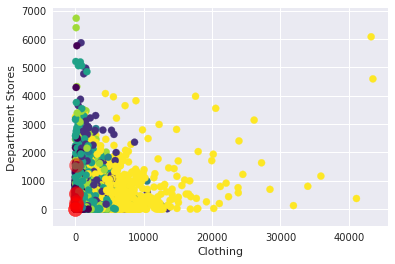

In [43]:
plt.scatter(cli_speso['Clothing'], cli_speso['Department Stores'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Clothing')
plt.ylabel('Department Stores')

plt.scatter(centers[:, 6], centers[:, 10], c='red', s=200, alpha=0.5);

#### Clothing Vs. Food & Drink

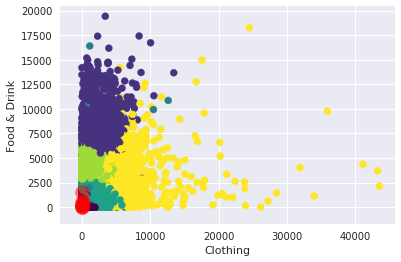

In [44]:
plt.scatter(cli_speso['Clothing'], cli_speso['Food & Drink'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Clothing')
plt.ylabel('Food & Drink')

plt.scatter(centers[:, 6], centers[:, 10], c='red', s=200, alpha=0.5);

#### Petrol Vs. Food & Drink

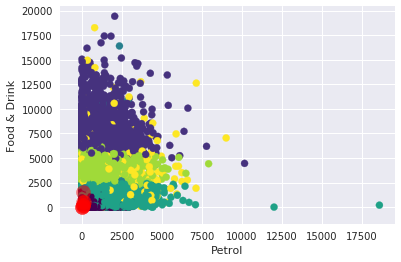

In [45]:
plt.scatter(cli_speso['Petrol'], cli_speso['Food & Drink'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Petrol')
plt.ylabel('Food & Drink')

plt.scatter(centers[:, 6], centers[:, 10], c='red', s=200, alpha=0.5);

#### Clothing Vs. Restaurant

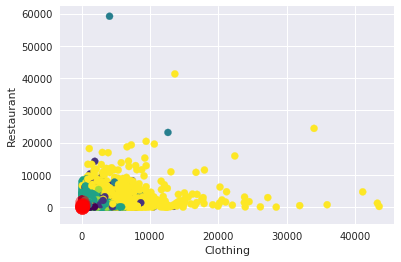

In [46]:
plt.scatter(cli_speso['Clothing'], cli_speso['Restaurant'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Clothing')
plt.ylabel('Restaurant')

plt.scatter(centers[:, 6], centers[:, 10], c='red', s=200, alpha=0.5);

#### Hotels Vs Restaurant

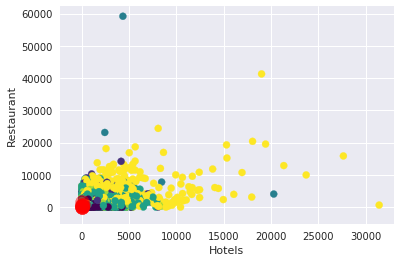

In [47]:
plt.scatter(cli_speso['Hotels'], cli_speso['Restaurant'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Hotels')
plt.ylabel('Restaurant')

plt.scatter(centers[:, 6], centers[:, 10], c='red', s=200, alpha=0.5);

## Principal Component Analysis (PCA) sul modello TARGET

Principal component analysis (PCA) è una procedura che trasforma un numero di variabili (possibilmente) correlate in un numero piu ristretto di variabili non correlate. Tali variabioli si dicono *principal components*

Il primo principal component tniene conto delle variabilità dei dati e ogni componente successivo tiene conto delle variabili successive

Tradizionalmente, la principal component analysis utilizza una matrice simmetrica 
Puo essere SSCP matrix (sommed dei quadrari e dei prodotti), Covariance matrix (somme scalate dei quadrari e dei prodotti), o Correlation matrix (somme scalate dei quadrari e dei prodotti sui dati standardizzati). 


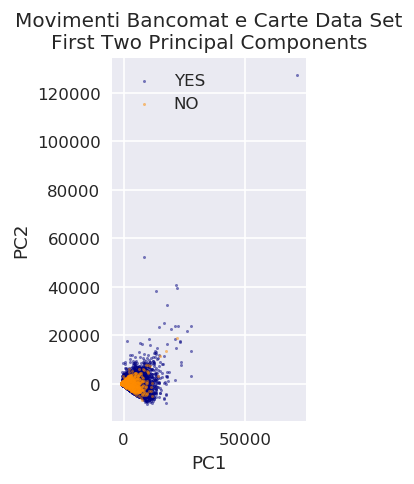

In [48]:
from sklearn.decomposition import PCA

#target_model.fillna(0, inplace=True)

X=target_model[cli_speso.columns]
tgt_columns=['fl_tgt_prestiti', 'fl_tgt_protezione', 'fl_tgt_mutui']
y=target_model[ 'fl_tgt_fndmdl']    #target variable

pca = PCA(n_components=2).fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

# plot della figura
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Movimenti Bancomat e Carte Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()